In [10]:
graphics_toolkit("gnuplot"); % this line is needed only in Octave

## Řešení 1d úlohy s konvektivním členem pomocí metody konečných diferencí <br> (metoda sítí, finite differences method) 

Úkolem je vyřešit následující okrajovou úlohu pomocí metody konečných diferencí. Tuto úlohu umíme řešit i analyticky. Získané numerické řešení tedy porovnejte s analytickým a ověřte, zda je numerická aproximace přesnější, když použijete jemnější mřížku (vyšší hodnotu parametru **n**).

In [11]:
% plot of the numerical solution
%   -k*u''(x)+D*u'(x)=f
%   u(0)=U
%   -k*u'(l)=T

Nastavení všech parametrů výše specifikované úlohy. <br> Začněte nejprve s těmito parametry a až úkol dokončíte, zkuste provádět jejich změny a zkoumat vliv na řešení úlohy.

In [26]:
f=1;
k=1;
L=1;
D=10;
U=1;
T=-0.1;

Řešte úlohu nejprve pomocí metody konečných diferencí. Níže máme nastavení parametrů sítě.

In [27]:
%% solution using finite diferences (system of size (n+1)x(n+1) including Dirichlet b.c.)
n=10;           % number of steps (discretization intervals)
h=L/n;          % length of one step

Zde máme na výběr 3 možnosti aproximace konvektivního členu $D \cdot u'(x)$
- pomocí centrálních diferencí (central)
- pomocí dopředných diferencí (down-stream)
- pomocí zpětných diferencí (up-stream)

Začněme například zpětnými diferencemi:

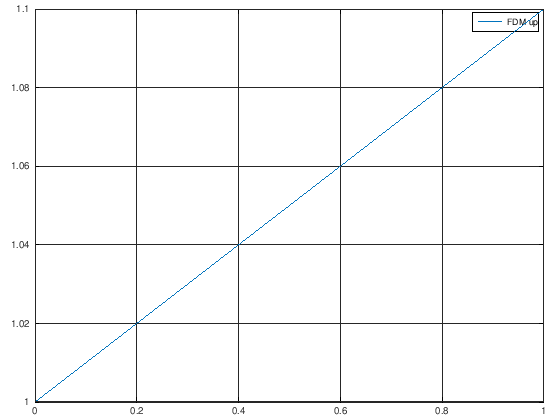

In [28]:
%  using up-stream differences
A=(1+h*D/(k))*diag(ones(n,1),-1)-(2+D*h/k)*diag(ones(n+1,1))+(1)*diag(ones(n,1),1); % matrix assembly
b=-ones(n+1,1)*h^2*f/k; % right hand side
b(1)=U; A(1,1)=1; A(1,2)=0;     % Dirichlet boundary condition
b(end)=b(end)+T*h/k;            % Neumann b. c.
A(end,end)=A(end,end)+1;        % Neumann b. c.
u_FDM_up=A\b;          % solution of the linear system
x_FDM=linspace(0,L,n+1); % points of visualization given by the discretization

figure(1)
plot(x_FDM,u_FDM_up) % plot of the numerical solution
legend('FDM up');
grid on

Pro srovnání vyřešíme úlohu také analyticky. Analytické řešení vykreslete a porovnejte s numerickým:

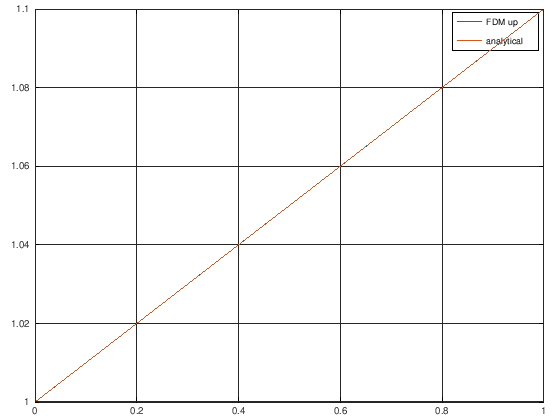

In [29]:
%% analytical solution
C2=(-T/k-f/D)/(D/k*exp(D*L/k));
C1=U-C2;
u_analytical=@(x)C1+C2*exp(D/k*x)+f/D*x;
x_analytical=linspace(0,L,100);        % points of visualization

figure(2)
plot(x_FDM,u_FDM_up) % plot of the numerical solution
hold on
plot(x_analytical,u_analytical(x_analytical)) % plot of the analytical solution
legend('FDM up','analytical');
grid on

## Další úkoly:
1) Přidejte k předchozímu porovnání řešení s využitím centrálních diferencí. <br>
2) Přidejte k předchozímu porovnání řešení s využitím zpětných diferencí. <br>
3) Všechna 4 řešení vykreslete.

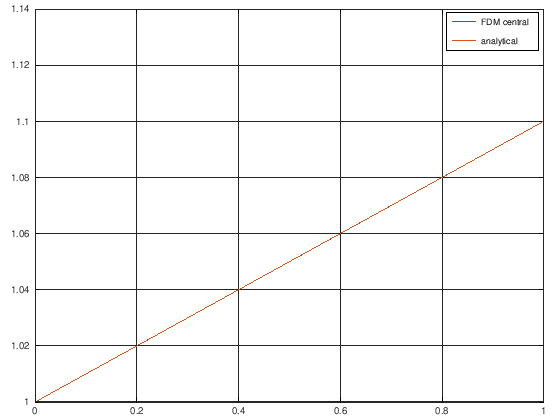

In [30]:
%  using central differences
A=(1+h*D/(2*k))*diag(ones(n,1),-1)-2*diag(ones(n+1,1))+(1-h*D/(2*k))*diag(ones(n,1),1); % matrix assembly
b=-ones(n+1,1)*h^2*f/k; % right hand side
b(1)=U; A(1,1)=1; A(1,2)=0;         % Dirichlet boundary condition
b(end)=b(end)+2*h*T/k*(1-h*D/2/k);  % Neumann b. c.
A(end,end-1)=2;                     % Neumann b. c.
u_FDM_central=A\b;          % solution of the linear system

figure(3)
plot(x_FDM,u_FDM_central) % plot of the numerical solution
hold on
plot(x_analytical,u_analytical(x_analytical)) % plot of the analytical solution
legend('FDM central','analytical');
grid on

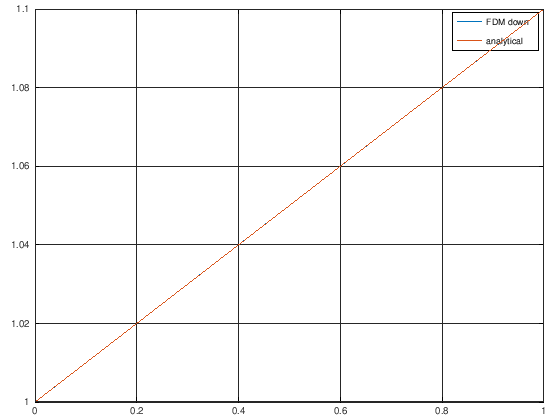

In [31]:
%  using down-stream differences
A=(1)*diag(ones(n,1),-1)+(-2+D*h/k)*diag(ones(n+1,1))+(1-h*D/k)*diag(ones(n,1),1); % matrix assembly
b=-ones(n+1,1)*h^2*f/k; % right hand side
b(1)=U; A(1,1)=1; A(1,2)=0;     % Dirichlet boundary condition
b(end)=b(end)+h*T/k*(1-h*D/k);  % Neumann b. c.
A(end,end)=A(end,end)+1-D*h/k;  % Neumann b. c.
u_FDM_down=A\b;          % solution of the linear system

figure(4)
plot(x_FDM,u_FDM_down) % plot of the numerical solution
hold on
plot(x_analytical,u_analytical(x_analytical)) % plot of the analytical solution
legend('FDM down','analytical');
grid on

Výsledné grafické porovnání:

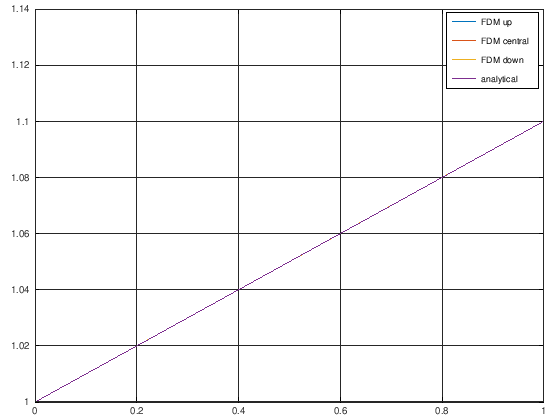

In [32]:
figure(4)
plot(x_FDM,u_FDM_up) % plot of the numerical solution
hold on
plot(x_FDM,u_FDM_central)
plot(x_FDM,u_FDM_down)
plot(x_analytical,u_analytical(x_analytical)) % plot of the analytical solution
legend('FDM up','FDM central','FDM down','analytical');
grid on

## Numerické experimenty:
Zkuste navyšovat hodnotu koeficientu $D$ u konvektivního členu a sledujte kvalitu jednotlivých numerických aproximací.